# Single-Network Models

Consider a social network. A common question as a scientist that we might have is how, exactly, we could describe the network in the simplest way possible. For instance, if we know nothing about the people, or how they might be connected in the social network, we might want to just say that a pair of people have a probability of being friends. On the other hand, if we know people within the social network are groups of students from different schools, we might want to say that people from the same school have a higher probability of being friends than people from different schools. The way in which we choose describe these two different viewpoints is called the choice of an appropriate single-network model.

The single-network model defines a set of behaviors (or, *statistical properties*) that the network might have.  Our goal is to propose a framework under which we could end up with a network that looks similar to our own. This approach, called a *generative model*, means that we describe the properties of data which we observe directly in our network; in this case, the nodes and edges of our network, in a statistical way. Stated another way, for each edge in the network, we want to propose a process that could give us observed edges that behave like the edges in our network.

Before we get started, it is important to clarify that, as scientists, we must pay careful attention to the age old aphorism attributed to George Box, a pioneering British statistician of the 20$^{th}$ century. George Box states, "all models are wrong, but some are useful." In this sense, it is important to note that the statistical model selected is, in practice, virtually *never* the correct model (for any aspect of science, not just network statistics). In the context of network statistics, this means that even if we have a model we think describes our network very well, it is very unlikely to be the case that the model we selected is actually accurate. For instance, in our social network example, we might only know whether two people are from the same school, and might not know whether they are in the same grade or share classes together, even though we would expect these facts to impact whether they might have a higher chance of being friends. Further, we might not even believe that the network is random at all. We might think that if we knew enough about a pair of people, we could definitively determine whether or not they are friends, and therefore thinking of friendship as a random process doesn't even make sense! We will almost never have all of the information needed to convey the complex structure of a network, and that's okay. Rather, we select a model which is appropriate from a family of candidate models on the basis of two primary factors:
1. The model possesses the level of refinement or complexity needed to answer our scientific question of interest, and 
2. The model is appropriate for the data we are given.

The remainder of this section will deal with developing intuition for 1., and a later chapters on model selection will cover 2. 

## Erd&ouml;s-R&eacute;nyi (ER)

The simplest random network model is the Erd&ouml;s R&eacute;nyi (ER) model<sup>1</sup>. Consider the social network example explained above. If we do not know any patterns defining how people are or are not friends, the simplest possible thing to do with our network would be to assume that a given pair of people within our network have the same chance of being friends as any other selected pair of people. The Erd&ouml;s R&eacute;nyi model formalizes this relatively  situation with a single parameter:

1. $p$: an edge existence probability parameter governing how edges are connected.  

In an Erd&ouml;s R&eacute;nyi network, each pair of nodes is connected with probability $p$, and therefore not connected with probability $1-p$. Further, no other properties of the network (including which vertices an edge is incident, other edges within the graph, or any other factors) influence whether a pair of vertices are connected. Statistically, we write that for each edge $A_{ij}$, that $A_{ij}$ is sampled independently and identically from a $Bernoulli(p)$ distribution. The word "independent" means that edges in the network occurring or not occurring do not affect one another. The word "identical" means that every edge in the network has the same probability $p$ of being connected.

In practice, the ER model seems like it might be a little too simple to be useful. Why would it ever be useful to think that the best we can do to describe our network is to say that connections exist with some probability? Doesn't this miss a *lot* of useful questions we might want to answer? Fortunately, there are a number of positive aspects to the ER network's simplicity. Given a probability value, we can easily describe the properties we would expect to see in a network if that network were ER. Further, we can reverse this idea, too: given a network we think might *not* be ER, we could check whether it's different in some way (say, the degree distribution) from a network which is ER. If we find that a network is not well described by an ER model, we might look for other, more complex, models that could describe our network. Further, the ER model is useful for the development of new computational techniques to use on random networks. This is because even if the "best" model for a network is something much more complex, we can still summarize that more complex model using a $p$ term without much work. Consider, for instance, a case where we design a new algorithm for a social network, and we want to know how much more RAM we might need as the social network grows. For this purpose, we might want to investigate how the algorithm scales to graphs with different numbers of people and different connection probabilities that might be realistic for the development of our social network. This is a common approach when people deal with networks that are said to be *sparse*, or where $p$ is very small.

In the next code block, we look to sample a single ER network with $50$ nodes and an edge probability $p$ of $0.3$:

<AxesSubplot:title={'center':'ER(50, 0.3) Simulation'}>

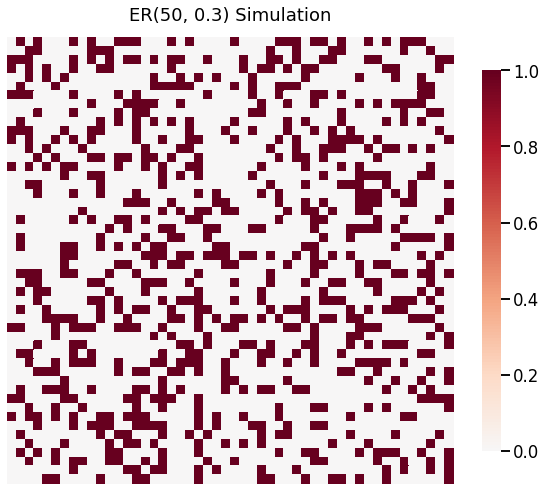

In [1]:
from graspologic.plot import heatmap
from graspologic.simulations import er_np

n = 50  # graph with 50 vertices
ps = 0.3  # probability of an edge existing is .3

# sample a single adj. mtx from ER(50, .3)
As = er_np(n=n, p=ps, directed=True, loops=True)

# and plot it
heatmap(As, title="ER(50, 0.3) Simulation")

Above, we visualize the network using a heatmap. The dark red squares indicate that an edge exists between a pair of vertices, and white squares indicate that an edge does not exist between a pair of vertices.

If we already have a network, we might want to assume that the network is an ER network, and investigate the edge probability parameter. Next, we use graspologic to estimate it:

In [3]:
from graspologic.models import EREstimator

# instantiate an ER Estimator which is directed with loops
er = EREstimator(directed=True, loops=True)
# fit an ER model to As
er.fit(As)
print(f"ER \"p\" parameter: {er.p_}")

ER "p" parameter: 0.302


As we can see, the edge probability parameter in a directed network with loops is just the average fraction of adjacencies in $\pmb A$ which have a value of $1$:

In [4]:
print(f"Average edge weight: {As.mean()}")

Average edge weight: 0.302


Note that the $p$ parameter will be computed differently depending on whether the network is assumed to be directed or

<AxesSubplot:title={'center':'ER(50, 0.7) Simulation'}>

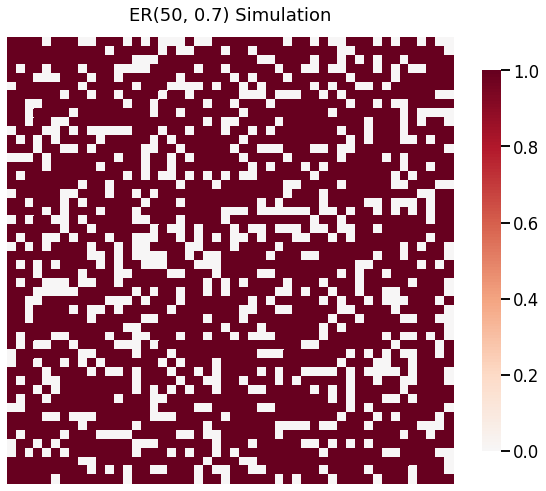

In [5]:
pl = 0.7  # graph has an edge probability of 0.7

# sample a single adj. mtx from ER(50, 0.7)
Al = er_np(n=n, p=pl, directed=True, loops=True)

# and plot it
heatmap(Al, title="ER(50, 0.7) Simulation")

As the edge existence probability increases, the sampled adjacency matrix tends to have more adjacencies with values of $1$. This is because there is a higher chance of an edge existing when $p$ is larger.

## Stochastic Block Model (SBM)

The Stochastic Block Model, or SBM, is a random graph model which produces graphs in which edge existence probabilities depend upon which vertices a given edge is adjacent to. If the graph $G = (\mathcal V, \mathcal E)$ is an SBM with $n$ vertices, each vertex $v_i$ can take be a member of one (and only one) of $K$ possible communities. In this case, rather than having a single edge existence probability, each pair of communities has its own unique edge existence probability. Formally, $G$ has the parameters:
1. $n$: the number of vertices,
2. $\vec \tau \in \{1, ..., K\}^n$: the vertex assignment vector for each of the $n$ vertices to one of $K$ communities, and
3. $\pmb B \in [0, 1]^{K \times K}$: the symmetric edge existence probability for each of the $K \times K$ possible communities.

The vertex assignment vector has entries $\vec \tau_i$, where $i = 1, ..., n$, for each of the vertices in the graph. For a given vertex $v_i \in \mathcal V$, the corresponding vertex assignment $\vec \tau_i$ defines which of the $K$ communities in which $v_i$ is a member. For instance, in a social network in which the vertices are students and the edges define whether two students are friends, a vertex assignment vector might denote the school in which each student learns. The matrix $\pmb B$ with entries $b_{kl}$ for $k, l = 1,..., K$ defines the probability of an edge existing between vertices which are in community $k$ with vertices which are in community $l$. For instance, in the social network example, one might select $\pmb B$ such that the diagonal entries $b_{kk}$ for $k = 1,..., K$ tend to exceed off-diagonal entries $b_{kl}$ where $k \neq l$ and $k,l = 1,...,K$. Further, the matrix $\pmb B$ is supposed to be symmetric; that is, for any $b_{kl}$, it is always the case that $b_{k,l} = b_{lk}$ for all $k = 1,..., K$. Intuitionally, this would correspond to the graph in which each of the  The matrix $\pmb B$ defines that if vertex $v_i$ is in community $k$ and vetex $v_j$ is in community $l$, then an edge $e_{ij}$ or $e_{ji}$ exists between $v_i$ and $v_j$ with probability $b_{kl}=b_{lk}$. Fomally, we wite that $\pmb A \sim SBM_n(\vec \tau, \pmb B)$ if $A_{ij} | v_i = k, v_j = l \sim Bernoulli(b_{kl})$, or equivalently due to the symmetry of $\pmb B$, $A_{ji} | v_i = k, v_j = l \sim Bernoulli(b_{kl})$, for all $i,j \in 1,...,n$.

The following python code can be used to generate and visualize the adjacency matrices describing a graph which has the $SBM_n(\vec \tau, \pmb B)$ distribution.

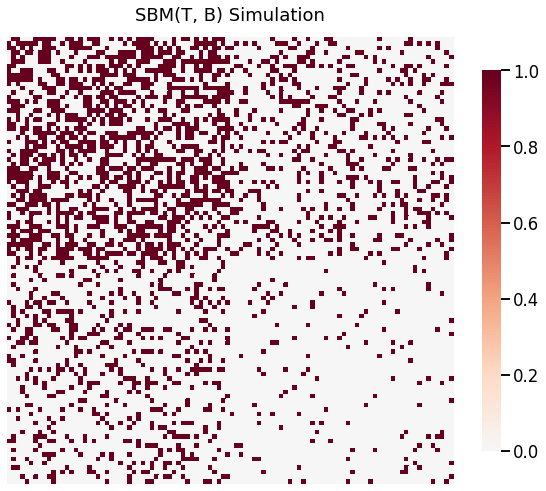

In [7]:
from graspologic.simulations import sbm

# for simplicity, the simulation code generates samples wherein
# vertices from the same community are ordered in the vertex set by
# their community order. Note that it would be theoretically equivalent to
# denote the total number of vertices in each community, or provide
# a vector tau with the first 50 entries taking the value 1, and the
# second 50 enties taking the value 0, given this fact.
ns = [50, 50]
n = sum(ns)

n = sum(ns)  # total number of vertices is the sum of the 
B = [[.5, .2],
    [.2, .05]]

A = sbm(n=ns, p=B)
_=heatmap(A, title="SBM(T, B) Simulation")

In the above simulation, we can clearly see an apparent $4$-"block structure", which describes the fact that the probability of an edge existing depends upon which of the $4$ "blocks" the edge falls into. These blocks are the apparent "subgraphs", or square patterns, observed in the above graph. The block structure is clearly delineated by the first $50$ vertices being from a single community, and the second $50$ vertices being from a different community.

It is important to note that a graph may be $SBM_n(\vec \tau, \pmb B)$ regardless of whether a block structure is visually discernable. Indeed, the block structure may only be apparent given a particular ordering of the vertices, an otherwise, may not even be discernable at all. Consider, for instance, a similar adjacency matrix to the graph plotted above, with the exact same realization, up to a permutation (reordering) of the vertices. The below graph shows the exact same set of adjacencies as-above, but wherein $\pmb A$ has had its vertices resorted randomly. The graph has an identical block structuure (up to the reordering of the vertices) as the preceding graph illustrated.

<ipython-input-11-8581568507e8>:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  heatmap(A[[vtx_perm]] [:,vtx_perm])


<AxesSubplot:>

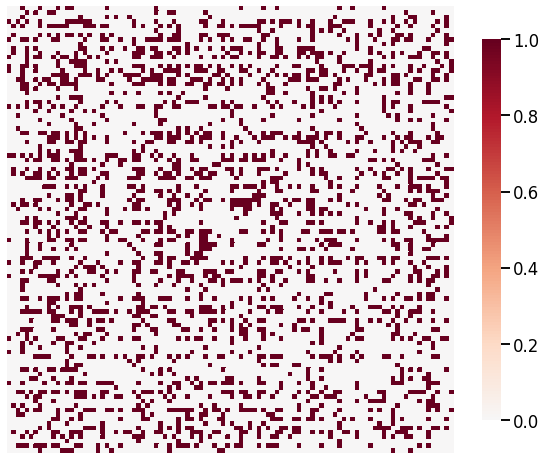

In [11]:
import numpy as np

# generate a permutation of the n vertices
vtx_perm = np.random.choice(n, size=n, replace=False)

# same adjacency matrix (up to reorder of the vertices)

heatmap(A[[vtx_perm]] [:,vtx_perm])

In this sense, it becomes quite difficult in practice to determine whether community structure exists simply by looking at a graph, unless you are looking at a graph in which the vertices are already arranged in an order which respects the community struucture. 

## Structured Independent Edge Model (SIEM)

## Random Dot Product Graph (RDPG)

## Generalized Random Dot Product Graph (GRDPG)

## Degree-Corrected Models

## Inhomogeneous Erdos-Renyi (IER)

# References

[1] Erd&ouml;s P, R&eacute;nyi A. 1959. "On random graphs, I." Publ. Math. Debrecen 6:290–297.
